# Diffusion Currents affect Measurements of the Spine Neck Resistance
In several experiments the spine neck resistance gets estimated based on a voltage divider model. But diffusion currents boost the membrane voltage and the linear dependence between synaptic current and head depolarization is lost. The spine neck resistance does not behave like an Ohmic resistor any more. To study how different spine morphologies and various synaptic inputs affect measurements of the spine neck resistance the head membrane depolarizaition gets measured vor various combinations of the neck diameter and the spine head volume. The neck diameter affects the electric resistance at rest and the spine head volume how ion concentratoins are changeing which affects diffusion currents.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
from itertools import product # permutations

from sys import path
#path.append('./../spineSimulator/')
#import plot
#from simulation_parameters import simulation_parameters


path.append('./../')
import spineSimulator
from spineSimulator import plot

#from importlib import reload
#reload(plot)

### Simulation parameters
Parameters of all setups studied.

In [18]:
head_diameters = [1.5e-07, 2.0e-07, 2.5e-07, 3.0e-07, 3.5e-07]
neck_diameters = [2.0e-08, 2.75e-08, 3.5e-08, 4.25e-08, 5.0e-08]
synaptic_currents = ['150.e-12,0.e-12', '250.e-12,0.e-12', '350.e-12,0.e-12',] 
start_column = 123 + 1
#for i, p in enumerate(product(head_diameters, neck_diameters, synaptic_currents)):
#    hd, nd, isyn  = p
#    print(i, hd, nd, isyn)

In [19]:
param_sheet = pd.read_excel('./../simulation_parameters.xls')
#param_sheet.rename(index=param_sheet['param'])
param_sheet

,Unnamed: 0,param,0,1,2,3,4,5,6,7,...,196,197,198,199,200,201,202,203,204,205
0,0,T,0.00001,0.02,0.1,0.1,0.1,0.1,0.1,0.1,...,0.02,0.02,0.02,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.05
1,1,delta_t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,L,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
3,3,n_h,5,5,5,5,5,5,5,5,...,5,5,5,1,2,3,4,5,6,5
4,4,n_hnj,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,n_n,5,5,5,5,5,5,5,5,...,5,5,5,1,2,3,4,5,6,5
6,6,n_ndj,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,n_d,4,4,4,4,4,4,4,4,...,4,4,4,1,2,3,4,5,6,4
8,8,ah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,an,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Write simulation parameters to file

write = False

if write == True:
    for i, p in enumerate(product(head_diameters, neck_diameters, synaptic_currents)):
        hd, nd, isyn  = p
        #param_names = param_sheet[0]
        standard_params = param_sheet[1]
        new_params = copy.copy(standard_params)
        new_params[17] = 'resistance increase' 
        new_params[15] = isyn # synaptic current
        new_params[8] = hd # Head diameter
        new_params[9] = nd # Neck diameter

        #column_name = param_sheet.columns[-1]+1
        column_name = start_column + i
        param_sheet[column_name] = new_params

    param_sheet.loc[:,124:]

In [21]:
# save file
if write == True:
    param_sheet.to_excel(excel_writer='./../simulation_parameters.xls', sheet_name='simulation parameters' )

### Run simulations
run all simulations in Notebook run_FD_solver_test.ipynb

## Analysis

In [22]:
def get_voltage_boost(sim_id, t_measure, t_reference=0.):
    file_id = 'experiment_'+sim_id
    (x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary(file_id)
    phi_ref = (phi[t==t_reference,1]-phi[0,1])[0]
    phi_boosted = (phi[t==t_measure,1]-phi[0,1])[0]
    return phi_ref, phi_boosted
    
phi_cap, phi_boosted = get_voltage_boost('130', t_measure=0.01, t_reference=0.0001)

In [23]:
sim_id = 130
file_id = 'experiment_'+str(sim_id)
(x,
a,
t,
phi,
c_Na,
c_K,
c_Cl,
param_set,
params,
dx,
dt,
r_Na,
R_Na,
g_Na_ij,
r_K,
R_K,
g_K_ij,
r_Cl,
R_Cl,
g_Cl_ij,
r_e,
R_e,
g_ij,
i_c_Na,
i_c_K,
i_c_Cl,
i_e_Na,
i_e_K,
i_e_Cl,
i_e,
i_c,
i_total,
) = plot.get_results_summary(file_id)
i_total

array([[1.50000000e-11, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.50000000e-11, 1.49996365e-11, 1.49993235e-11, ...,
        1.49987776e-11, 1.49987775e-11, 1.49987771e-11],
       [1.50000000e-11, 1.49997239e-11, 1.49994613e-11, ...,
        1.49987148e-11, 1.49987150e-11, 1.49987147e-11],
       ...,
       [0.00000000e+00, 4.28616509e-17, 8.56062515e-17, ...,
        2.38093575e-16, 2.38751335e-16, 2.39134814e-16],
       [0.00000000e+00, 4.25502037e-17, 8.50115929e-17, ...,
        2.36867163e-16, 2.37688375e-16, 2.37589666e-16],
       [0.00000000e+00, 4.22579250e-17, 8.44118252e-17, ...,
        2.35113857e-16, 2.35290426e-16, 2.35160715e-16]])

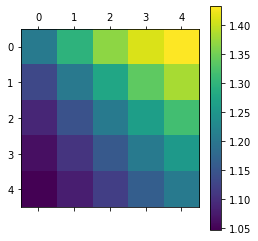

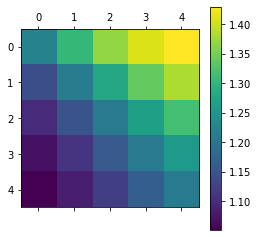

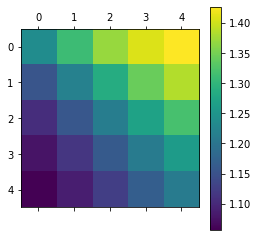

In [24]:
# read from file
n_heads = len(head_diameters)
n_necks = len(neck_diameters)
n_currents = len(synaptic_currents)

res_increase = np.zeros((n_currents,n_heads, n_necks))
v_boost = np.zeros((n_currents,n_heads, n_necks))
x_axis1 = np.zeros((n_currents,n_heads, n_necks))
hds = np.zeros((n_currents,n_heads, n_necks))
nds = np.zeros((n_currents,n_heads, n_necks))


for i, p in enumerate(product(head_diameters, neck_diameters, synaptic_currents)):
    hd, nd, isyn  = p

    column_name = start_column + i
    phi_cap, phi_boosted = get_voltage_boost(str(column_name), t_measure=0.01, t_reference=0.0001)
    res_boost = phi_boosted / phi_cap
    
    i_curr = np.where(np.array(synaptic_currents) == isyn)
    i_head = np.where(np.array(head_diameters) == hd)
    i_neck = np.where(np.array(neck_diameters) == nd)
        
    res_increase[i_curr, i_head, i_neck] = res_boost
    x_axis1[i_curr, i_head, i_neck] = hd/nd
    hds[i_curr, i_head, i_neck] = hd
    nds[i_curr, i_head, i_neck] = nd
    v_boost[i_curr, i_head, i_neck] = (phi_boosted - phi_cap) / phi_cap
    
    

for i in range(3):
    mat = plt.matshow(res_increase[i,:,:])
    cbar = plt.colorbar(mat)
    plt.show()


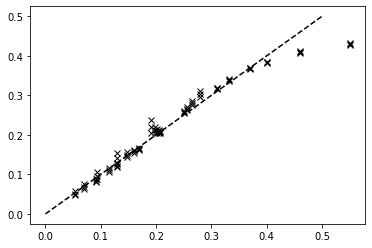

In [25]:
x = 1.8 * (nds.flatten())/(hds.flatten()) - .05
plt.plot(x,v_boost.flatten(),'kx')
plt.plot([0,0.5],[0,0.5],'k--')
#plt.xlim(0,0.4)
#plt.ylim(0,0.5)

(1.0, 1.5)

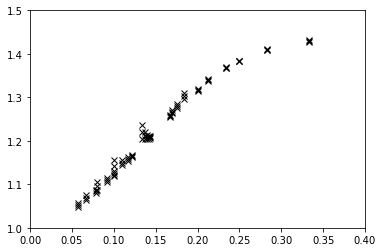

In [26]:
x = (nds.flatten())/(hds.flatten())

plt.plot(x,res_increase.flatten(),'kx')
plt.xlim(0,0.4)
plt.ylim(1,1.5)
#plt.plot(res_increase[1].flatten(),'rx')
#plt.plot(res_increase[1].flatten(),'gx')

### Depolarization boost
The depolarization boost colorcoded as a function of the neck diameter and the head diameter. One subpanel for each synaptic input value.

0.004091113496972776


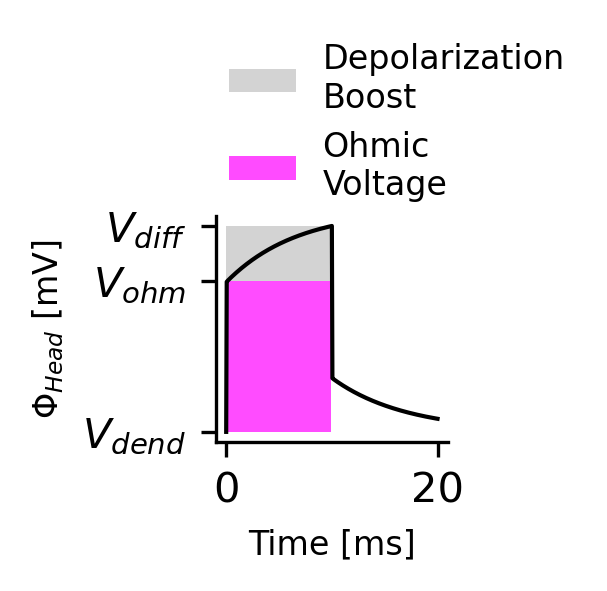

In [27]:
def plot_voltage_boost(sim_id, t_measure, t_reference=0., fig=0, ax=0):
    file_id = 'experiment_'+sim_id
    (x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary(file_id)
    phi_ref = phi[t==t_reference,1][0]
    phi_boosted = phi[t==t_measure,1][0]
    
    
    
    if fig == 0:
        fig = plt.figure(dpi=300, figsize=(1,1))
        ax = fig.add_subplot(111)
    
    nmax=200
    ax.fill_between(np.array(t[:nmax])*1.e3,[phi_ref*1.e3]*nmax,[phi_boosted*1.e3]*nmax,facecolor='lightgray', label='Depolarization\nBoost')
    ax.fill_between(np.array(t[:nmax])*1.e3,[phi_ref*1.e3]*nmax,[-70.]*nmax,facecolor='magenta', label='Ohmic\nVoltage', alpha=0.7)
    ax.plot(t*1.e3,phi[:,1]*1.e3, lw=1.,color='k')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Time [ms]', fontsize=8)
    ax.set_ylabel('$\Phi_{Head}$ [mV]', fontsize=8)
    ax.legend(fontsize=8, frameon=False, loc=(0.,1.))
    
    ax.set_yticks([phi[0,1]*1.e3,phi_ref*1.e3,phi_boosted*1.e3])
    ax.set_yticklabels(['$V_{dend}$','$V_{ohm}$','$V_{diff}$'])
    
    
    
plot_voltage_boost('130', t_measure=0.01, t_reference=0.0001)
print(phi_cap,)
plt.show()

### Relative Increase of Spine Neck Resistance 
Show realitve increase of measured spine neck resistance as a function of the depolarization boost. Assume voltage divider
$$
R_n = \frac{V_{sp}-V_{den}}{I_{syn}}
$$
The difference in the membrane depolarization between the spine head the dendrited is the sum of the initial depolrization when no diffusion currents are present $V_{el}$, and the sum of the depolarization boost caused by the diffsion of ions $V_{diff}$. 
$$
V_{sp}-V_{den} = V_{diff}+V_{el}
$$
The relative increase is shown for three different synaptic currents (different colors) and three differen initial depolarizations $V_{el}$ (solid, dotted and dashed lines).

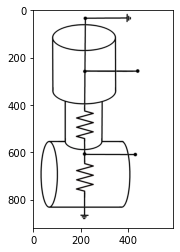

In [28]:
im = plt.imread('./../../../../Projects/PaperSpineElectrodiffusion/figures/cable/voltage_divider.png')
plt.imshow(im)

## Figure 05

/tmp/ipykernel_4523/4257133344.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+[str(h*1.e9) for h in neck_diameters],rotation=90, fontsize=8)
/tmp/ipykernel_4523/4257133344.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+[str(h*1.e9) for h in head_diameters], fontsize=8)
/tmp/ipykernel_4523/4257133344.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+[str(h*1.e9) for h in neck_diameters],rotation=90, fontsize=8)
/tmp/ipykernel_4523/4257133344.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+[str(h*1.e9) for h in head_diameters], fontsize=8)
/tmp/ipykernel_4523/4257133344.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+[str(h*1.e9) for h in neck_diameters],rotation=90, fontsize=8)
/tmp/ipykernel

[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]


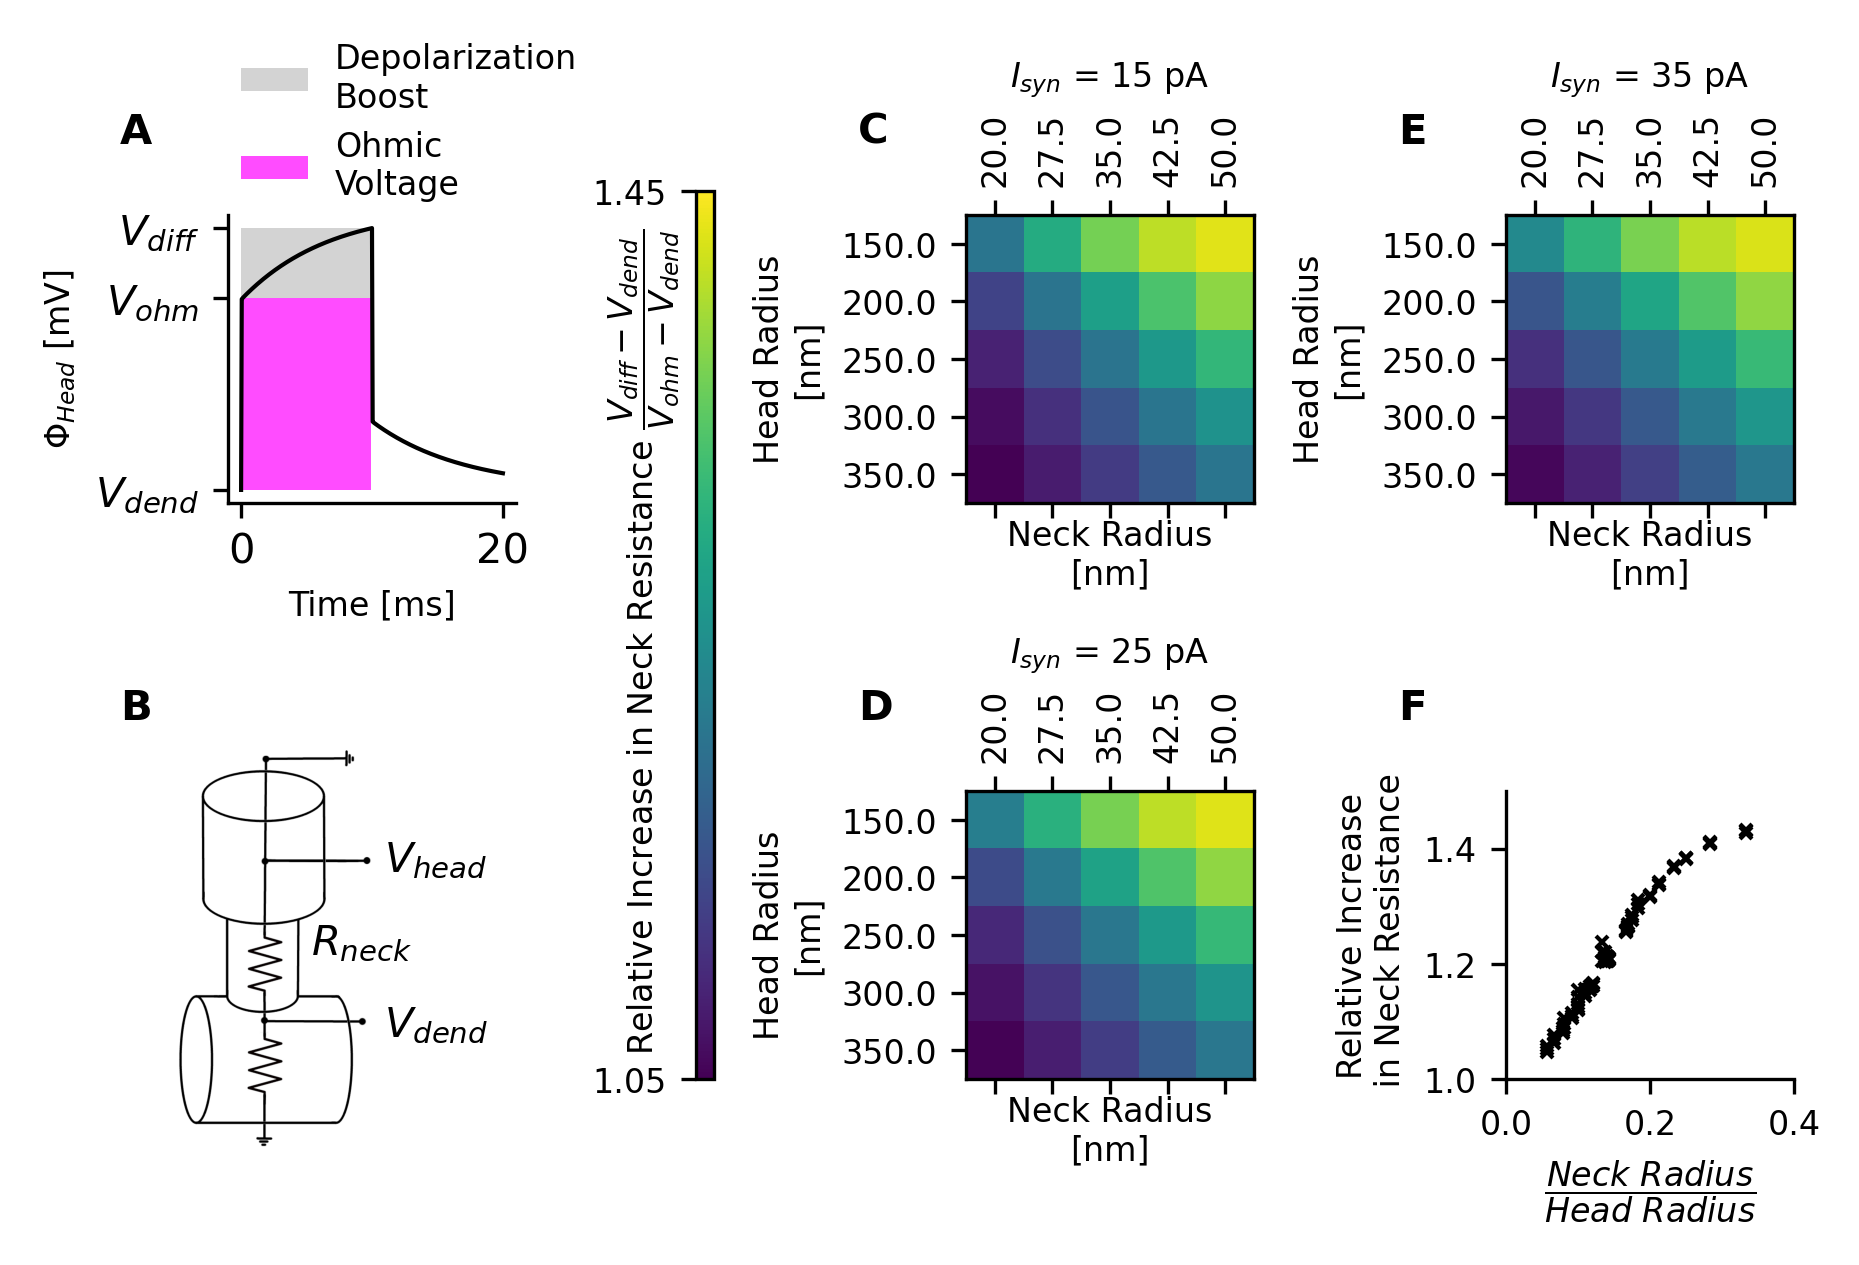

In [34]:
fig = plt.figure(dpi=300, figsize=(6,4))

frame = fig.add_axes([0,0,1,1])
frame.set_xticks(())
frame.set_yticks(())
frame.spines['top'].set_visible(False)
frame.spines['right'].set_visible(False)
frame.spines['left'].set_visible(False)
frame.spines['bottom'].set_visible(False)

x_pos = [0.11,0.52,0.82 ]
y_pos = [0.61,0.13]
xw, yw = 0.16,0.24

axes = []

l = ['A','B','C',
     'D','E','F'
    ]


li = 0
for xi in x_pos:
    for yi in y_pos:
        
        if li == 1:
            ax = fig.add_axes([0.05,0.06,.2,.35])
        else:
            ax = fig.add_axes([xi,yi,xw,yw])
        axes.append(ax)
        fig.text(xi-0.06,yi+yw+0.06,l[li], fontsize=10, weight='bold')
        li+=1


        
ax = axes[0]
plot_voltage_boost('130', t_measure=0.01, t_reference=0.0001, fig=fig, ax=ax)


ax = axes[1]
ax.imshow(im)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.text(480,280,"$V_{head}$")
ax.text(320,460,"$R_{neck}$")
ax.text(480,640,"$V_{dend}$")
ax.set_xticks(())
ax.set_yticks(())
#fig.text(0.75,y_pos[1]+yw+0.06,'F', fontsize=10, weight='bold')

        
ax = axes[2]
mat = ax.matshow(res_increase[0,:,:], vmin=1.05, vmax=1.45)
print(ax.get_yticklabels())
ax.set_xticklabels(['']+[str(h*1.e9) for h in neck_diameters],rotation=90, fontsize=8)
ax.set_yticklabels(['']+[str(h*1.e9) for h in head_diameters], fontsize=8)
ax.set_ylabel('Head Radius\n[nm]', fontsize=8)
ax.set_xlabel('Neck Radius\n[nm]', fontsize=8)
ax.set_title('$I_{syn}$ = '+str(synaptic_currents[0][:2])+' pA', fontsize=8)

cbar_ax = fig.add_axes([0.37,0.13,0.01,0.74])
cbar = plt.colorbar(mat, cbar_ax,)
cbar.ax.tick_params(labelsize=8)
label=r'Relative Increase in Neck Resistance $\dfrac{V_{diff}-V_{dend}}{V_{ohm}-V_{dend}}$'
#cbar.set_label(label, size=8,)
fig.text(0.32, .495, label,fontsize=8, rotation=90, va='center')
cbar.set_ticks((1.05,1.45))
cbar_ax.yaxis.set_ticks_position('left')

ax = axes[3]
ax.matshow(res_increase[1,:,:], vmin=1.05, vmax=1.45)
ax.set_xticklabels(['']+[str(h*1.e9) for h in neck_diameters],rotation=90, fontsize=8)
ax.set_yticklabels(['']+[str(h*1.e9) for h in head_diameters], fontsize=8)
ax.set_ylabel('Head Radius\n[nm]', fontsize=8)
ax.set_xlabel('Neck Radius\n[nm]', fontsize=8)
ax.set_title('$I_{syn}$ = '+str(synaptic_currents[1][:2])+' pA', fontsize=8)

ax = axes[4]
ax.matshow(res_increase[2,:,:], vmin=1.05, vmax=1.45)
ax.set_xticklabels(['']+[str(h*1.e9) for h in neck_diameters],rotation=90, fontsize=8)
ax.set_yticklabels(['']+[str(h*1.e9) for h in head_diameters], fontsize=8)
ax.set_ylabel('Head Radius\n[nm]', fontsize=8)
ax.set_xlabel('Neck Radius\n[nm]', fontsize=8)
ax.set_title('$I_{syn}$ = '+str(synaptic_currents[2][:2])+' pA', fontsize=8)

ax = axes[5]
x = (nds.flatten())/(hds.flatten())
ax.plot(x,res_increase.flatten(),'kx', ms=3.)
ax.set_xlim(0,0.4)
ax.set_ylim(1,1.5)
ax.set_xlabel('$\dfrac{Neck~Radius}{Head~Radius}$', fontsize=8)
ax.set_ylabel('Relative Increase\n in Neck Resistance', fontsize=8)
ax.tick_params(labelsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure5.eps')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure5.png')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure5.tif')

plt.show()